#### Electric Vehicle Population in USA

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Read csv file into a data frame
df = pd.read_csv("data.csv")

In [3]:
df.shape

(205439, 17)

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VIN (1-10)            205439 non-null  object 
 1   County                205436 non-null  object 
 2   City                  205436 non-null  object 
 3   State                 205439 non-null  object 
 4   Postal Code           205436 non-null  float64
 5   Model Year            205439 non-null  int64  
 6   Make                  205439 non-null  object 
 7   Model                 205438 non-null  object 
 8   E.V_Type              205439 non-null  object 
 9   CAFV                  205439 non-null  object 
 10  Electric Range        205431 non-null  float64
 11  Base MSRP             205431 non-null  float64
 12  Legislative District  204997 non-null  float64
 13  DOL Vehicle ID        205439 non-null  int64  
 14  Vehicle Location      205431 non-null  object 
 15  

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# Check for NaN
df.isna().sum()

VIN (1-10)                0
County                    3
City                      3
State                     0
Postal Code               3
Model Year                0
Make                      0
Model                     1
E.V_Type                  0
CAFV                      0
Electric Range            8
Base MSRP                 8
Legislative District    442
DOL Vehicle ID            0
Vehicle Location          8
Electric Utility          3
2020 Census Tract         3
dtype: int64

In [8]:
#Impute missing values
#Categorical imputation

categoric_imput = SimpleImputer(strategy= "most_frequent")
df[["County", "City", "Model", "Vehicle Location", "Electric Utility"]] = categoric_imput.fit_transform(
    df[["County", "City", "Model", "Vehicle Location", "Electric Utility"]])
# Numerical imputation
numeric_imput = SimpleImputer(strategy = "median")
df[["Postal Code", "Electric Range","Base MSRP", "Legislative District", "2020 Census Tract" ]] = numeric_imput.fit_transform(
    df[["Postal Code", "Electric Range","Base MSRP", "Legislative District", "2020 Census Tract" ]])

#Check for any missing values
print("missing values:",df.isna().sum())


missing values: VIN (1-10)              0
County                  0
City                    0
State                   0
Postal Code             0
Model Year              0
Make                    0
Model                   0
E.V_Type                0
CAFV                    0
Electric Range          0
Base MSRP               0
Legislative District    0
DOL Vehicle ID          0
Vehicle Location        0
Electric Utility        0
2020 Census Tract       0
dtype: int64


In [9]:
# Drop high cardinality features
df = df.drop(columns=["VIN (1-10)", "DOL Vehicle ID"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   County                205439 non-null  object 
 1   City                  205439 non-null  object 
 2   State                 205439 non-null  object 
 3   Postal Code           205439 non-null  float64
 4   Model Year            205439 non-null  int64  
 5   Make                  205439 non-null  object 
 6   Model                 205439 non-null  object 
 7   E.V_Type              205439 non-null  object 
 8   CAFV                  205439 non-null  object 
 9   Electric Range        205439 non-null  float64
 10  Base MSRP             205439 non-null  float64
 11  Legislative District  205439 non-null  float64
 12  Vehicle Location      205439 non-null  object 
 13  Electric Utility      205439 non-null  object 
 14  2020 Census Tract     205439 non-null  float64
dtype

##### Exploring Data

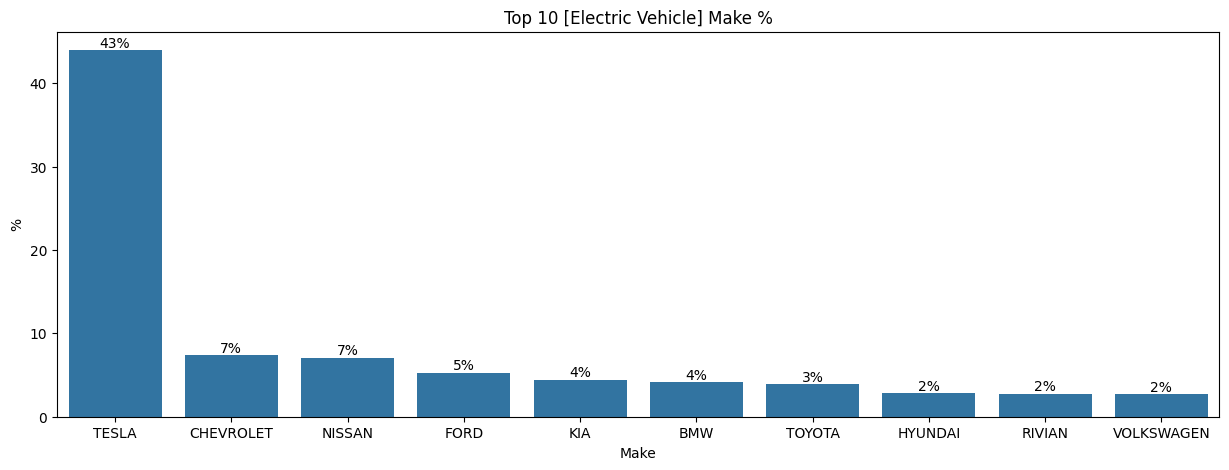

In [10]:
#Plot a bar plot showing top 10 "Make" of electric vehicles in %
fig, ax = plt.subplots (figsize = (15, 5))
sns.barplot((df.Make.value_counts(normalize=1)*100).head(10).reset_index
(name="%"), x = "Make", y="%")
for p in plt.gca().patches:
    plt.annotate(f"{int(p.get_height())}%",
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha = "center", va = "center",
                 xytext = [0, 5],
                 textcoords = "offset points" )
                 


plt.title("Top 10 [Electric Vehicle] Make %")
plt.show();



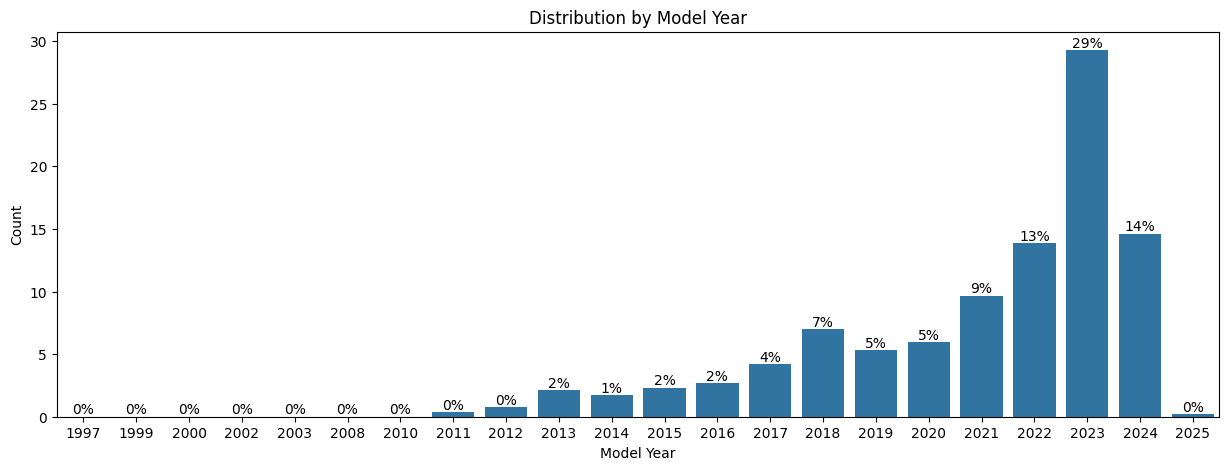

In [11]:
# plot ditribution of electric vehicles across the years
fig, ax = plt.subplots (figsize = (15, 5))
sns.barplot((df["Model Year"].value_counts(normalize=1)*100).reset_index(name= "Count"), x = "Model Year", y = "Count")
for p in plt.gca().patches:
    plt.annotate(f"{int(p.get_height())}%",
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha = "center", va = "center",
                 xytext = [0, 5],
                 textcoords = "offset points" )
plt.title("Distribution by Model Year")
plt.show;

            
            

In [12]:
# Convert categorical text data columns into numerical labels
encoder = LabelEncoder()
df["County"] = encoder.fit_transform(df["County"])
df["City"] = encoder.fit_transform(df["City"])
df["State"] = encoder.fit_transform(df["State"])
df["Make"] = encoder.fit_transform(df["Make"])
df["Model"] = encoder.fit_transform(df["Model"])
df["E.V_Type"] = encoder.fit_transform(df["E.V_Type"])
df["CAFV"] = encoder.fit_transform(df["CAFV"])
df["Vehicle Location"] = encoder.fit_transform(df["Vehicle Location"])
df["Electric Utility"] = encoder.fit_transform(df["Electric Utility"])


In [13]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract
0,88,608,42,98380.0,2023,38,115,1,0,42.0,0.0,35.0,633,71,5.303509e+10
1,88,67,42,98312.0,2018,28,85,0,0,151.0,0.0,35.0,605,71,5.303508e+10
2,86,611,42,98101.0,2020,36,87,0,0,266.0,0.0,43.0,480,55,5.303301e+10
3,86,611,42,98125.0,2014,28,85,0,0,84.0,0.0,46.0,460,55,5.303300e+10
4,183,767,42,98597.0,2017,7,20,0,0,238.0,0.0,20.0,566,71,5.306701e+10


In [14]:
# Split y into target variable and X into feature matrix
y = df['E.V_Type']
X = df.drop( columns='E.V_Type')

In [15]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [16]:
len(y)
len(X)

205439

In [17]:
X.shape

(205439, 14)

In [18]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [19]:
X

array([[0.43137255, 0.79063719, 0.95454545, ..., 0.6828479 , 0.97260274,
        0.94573045],
       [0.43137255, 0.08712614, 0.95454545, ..., 0.65264293, 0.97260274,
        0.94573025],
       [0.42156863, 0.79453836, 0.95454545, ..., 0.51779935, 0.75342466,
        0.94569257],
       ...,
       [0.84803922, 0.14694408, 0.95454545, ..., 0.13700108, 0.02739726,
        0.94623795],
       [0.42156863, 0.93107932, 0.95454545, ..., 0.56957929, 0.98630137,
        0.94569294],
       [0.84803922, 0.84525358, 0.95454545, ..., 0.12729234, 0.02739726,
        0.94623789]])

In [20]:
#Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [21]:
#Initialize models
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = KNeighborsClassifier()
model_4 = BaggingClassifier()
model_5 = ExtraTreesClassifier()
model_6 = AdaBoostClassifier()
model_7 = DecisionTreeClassifier()
model_8 = RandomForestClassifier()

In [22]:
#Train the models and fit them
model_1.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model_1.predict(X_test)

In [24]:
print(confusion_matrix(y_test,y_pred))

[[48244   236]
 [  701 12451]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     48480
           1       0.98      0.95      0.96     13152

    accuracy                           0.98     61632
   macro avg       0.98      0.97      0.98     61632
weighted avg       0.98      0.98      0.98     61632



In [26]:
model_2.fit(X_train, y_train)

SVC()

In [27]:
y_pred = model_2.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))

[[48310   170]
 [    2 13150]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       0.99      1.00      0.99     13152

    accuracy                           1.00     61632
   macro avg       0.99      1.00      1.00     61632
weighted avg       1.00      1.00      1.00     61632



In [30]:
model_3.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred = model_3.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred))

[[48305   175]
 [   45 13107]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       0.99      1.00      0.99     13152

    accuracy                           1.00     61632
   macro avg       0.99      1.00      0.99     61632
weighted avg       1.00      1.00      1.00     61632



In [34]:
model_4.fit(X_train, y_train)

BaggingClassifier()

In [35]:
y_pred = model_4.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred))

[[48478     2]
 [    2 13150]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       1.00      1.00      1.00     13152

    accuracy                           1.00     61632
   macro avg       1.00      1.00      1.00     61632
weighted avg       1.00      1.00      1.00     61632



In [38]:
model_5.fit(X_train,y_train)

ExtraTreesClassifier()

In [39]:
y_pred = model_5.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred))

[[48471     9]
 [    3 13149]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       1.00      1.00      1.00     13152

    accuracy                           1.00     61632
   macro avg       1.00      1.00      1.00     61632
weighted avg       1.00      1.00      1.00     61632



In [42]:
model_6.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [43]:
y_pred = model_6.predict(X_test)

In [44]:
print(confusion_matrix(y_test, y_pred))

[[48477     3]
 [    1 13151]]


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       1.00      1.00      1.00     13152

    accuracy                           1.00     61632
   macro avg       1.00      1.00      1.00     61632
weighted avg       1.00      1.00      1.00     61632



In [46]:
model_7.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = model_7.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))

[[48478     2]
 [    2 13150]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       1.00      1.00      1.00     13152

    accuracy                           1.00     61632
   macro avg       1.00      1.00      1.00     61632
weighted avg       1.00      1.00      1.00     61632



In [50]:
model_8.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = model_8.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_pred))

[[48472     8]
 [    0 13152]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48480
           1       1.00      1.00      1.00     13152

    accuracy                           1.00     61632
   macro avg       1.00      1.00      1.00     61632
weighted avg       1.00      1.00      1.00     61632



In [54]:

#List the models
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8]
model_name = ["LogisticRegression", "SVC", "KNeighborsClassifier", "BaggingClassifier",
          "ExtraTreesClassifier", "AdaBoostClassifier", "DecisionTreeClassifier", "RandomForestClassifier"]
# Calculating the model scores
train_score = [model.score(X_train, y_train) for model in models]
test_score = [model.score(X_test, y_test)for model in models]
# Calculating the ratio difference of the training and testing scores
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f"{result * 100:.2f}%")
#Measuring the state of the model
rating = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rating.append("bad")
    elif train > test * 1.10:
        rating.append("overfit")
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rating.append("middle")
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rating.append("good")
    elif train >= 0.80 and test < 0.80:
        rating.append("high train, low test")
    else:
        rating.append("unknown")
    



    
    


In [55]:
print("Length of model_name:", len(model_name))
print("Length of train_score:", len(train_score))
print("Length of test_score:", len(test_score))
print("Length of ratio:", len(ratio))
print("Length of rating:", len(rating))


Length of model_name: 8
Length of train_score: 8
Length of test_score: 8
Length of ratio: 8
Length of rating: 8


In [56]:
#Create a DataFrame for model scores
model_score = pd.DataFrame({
        "Model" : model_name,
        "Train Score" : [f"{round(score *100, 2)}%" for score in train_score],
        "Test Score" : [f"{round(score *100, 2)}%" for score in test_score],
        "Ratio Difference" : ratio,
        "Model Evauation" : rating
        
        
        })
model_score

,Model,Train Score,Test Score,Ratio Difference,Model Evauation
0,LogisticRegression,98.51%,98.48%,0.03%,good
1,SVC,99.69%,99.72%,-0.03%,good
2,KNeighborsClassifier,99.75%,99.64%,0.11%,good
3,BaggingClassifier,100.0%,99.99%,0.01%,good
4,ExtraTreesClassifier,100.0%,99.98%,0.02%,unknown
5,AdaBoostClassifier,99.99%,99.99%,-0.00%,good
6,DecisionTreeClassifier,100.0%,99.99%,0.01%,good
7,RandomForestClassifier,100.0%,99.99%,0.01%,good
